In [6]:
%matplotlib inline
from matplotlib import pylab

## the preparatory commands

```
# extract ~300 shewanella signatures across all ksizes
sourmash sig grep Shewanella /group/ctbrowngrp/sourmash-db/gtdb-rs207/gtdb-rs207.genomic.k?1.zip -o shewanella.zip

# pull out a query
sourmash sig grep OS185 shewanella.zip -o query-os185.zip

# run prefetch at each ksize
sourmash prefetch -k 21 query-os185.zip shewanella.zip --threshold-bp=0 -o os185.k21.csv
sourmash prefetch -k 31 query-os185.zip shewanella.zip --threshold-bp=0 -o os185.k31.csv
sourmash prefetch -k 51 query-os185.zip shewanella.zip --threshold-bp=0 -o os185.k51.csv
```

In [1]:
ls

Untitled.ipynb                       os185.k51.csv
gtdb-rs207.genomic-reps.dna.k31.zip  query-os185.zip
os185.k21.csv                        shewanella.zip
os185.k31.csv


In [2]:
import pandas

k21 = pandas.read_csv('os185.k21.csv')
k31 = pandas.read_csv('os185.k31.csv')
k51 = pandas.read_csv('os185.k51.csv')

In [9]:
k21.head()

,intersect_bp,jaccard,max_containment,f_query_match,f_match_query,match_filename,match_name,match_md5,match_bp,query_filename,...,ksize,moltype,scaled,query_n_hashes,query_abundance,query_containment_ani,match_containment_ani,average_containment_ani,max_containment_ani,potential_false_negative
0,24000,0.002359,0.004908,0.004908,0.004522,/dev/fd/63,GCF_009183365.2 Shewanella algae strain=CECT-5...,50d10be5,4890000,/dev/fd/63,...,21,DNA,1000,5307,False,0.773305,0.776324,0.774814,0.776324,False
1,24000,0.002370,0.004955,0.004955,0.004522,/dev/fd/63,GCF_009730655.1 Shewanella algae strain=RQs-10...,4c44260d,4844000,/dev/fd/63,...,21,DNA,1000,5307,False,0.773305,0.776673,0.774989,0.776673,False
2,23000,0.002338,0.005049,0.005049,0.004334,/dev/fd/63,"GCF_007595375.1 Shewanella algae strain=CLS3, ...",d0c9125d,4555000,/dev/fd/63,...,21,DNA,1000,5307,False,0.771739,0.777375,0.774557,0.777375,False
3,12000,0.001316,0.003138,0.003138,0.002261,/dev/fd/63,GCF_014651955.1 Shewanella fodinae strain=KCTC...,3166e878,3824000,/dev/fd/63,...,21,DNA,1000,5307,False,0.748197,0.759965,0.754081,0.759965,False
4,18000,0.001574,0.003392,0.002927,0.003392,/dev/fd/63,GCF_002005305.1 Shewanella psychrophila strain...,d51e1106,6149000,/dev/fd/63,...,21,DNA,1000,5307,False,0.762783,0.757453,0.760118,0.762783,False


In [28]:
k21_sub = k21[["query_name", "match_name", "intersect_bp", "query_containment_ani"]]
k31_sub = k31[["query_name", "match_name", "intersect_bp", "query_containment_ani"]]
k51_sub = k51[["query_name", "match_name", "intersect_bp", "query_containment_ani"]]

k21_sub.columns = ['qname', 'mname', 'k21_bp', 'k21_ani']
k31_sub.columns = ['qname', 'mname', 'k31_bp', 'k31_ani']
k51_sub.columns = ['qname', 'mname', 'k51_bp', 'k51_ani']

#print(len(k21_sub), len(k31_sub))

k_sub = k21_sub.merge(k31_sub, on=["qname", "mname"], how="inner")
k_sub = k_sub.merge(k51_sub, on=["qname", "mname"], how="inner")

In [29]:
k_sub

,qname,mname,k21_bp,k21_ani,k31_bp,k31_ani,k51_bp,k51_ani
0,GCF_000017325.1 Shewanella baltica OS185 strai...,GCF_009183365.2 Shewanella algae strain=CECT-5...,24000,0.773305,11000,0.819944,5000,0.872947
1,GCF_000017325.1 Shewanella baltica OS185 strai...,GCF_009730655.1 Shewanella algae strain=RQs-10...,24000,0.773305,10000,0.817427,5000,0.872947
2,GCF_000017325.1 Shewanella baltica OS185 strai...,"GCF_007595375.1 Shewanella algae strain=CLS3, ...",23000,0.771739,11000,0.819944,5000,0.872947
3,GCF_000017325.1 Shewanella baltica OS185 strai...,GCF_014651955.1 Shewanella fodinae strain=KCTC...,12000,0.748197,2000,0.776071,3000,0.864247
4,GCF_000017325.1 Shewanella baltica OS185 strai...,GCF_002005305.1 Shewanella psychrophila strain...,18000,0.762783,6000,0.804068,3000,0.864247
...,...,...,...,...,...,...,...,...
300,GCF_000017325.1 Shewanella baltica OS185 strai...,GCF_000813075.1 Shewanella sp. ECSMB14102 stra...,24000,0.773305,10000,0.817427,5000,0.872947
301,GCF_000017325.1 Shewanella baltica OS185 strai...,GCF_017354965.1 Shewanella sp. FJAT-52962 stra...,26000,0.776258,6000,0.804068,5000,0.872947
302,GCF_000017325.1 Shewanella baltica OS185 strai...,GCF_002738015.1 Shewanella xiamenensis strain=...,171000,0.849101,87000,0.876509,30000,0.904161
303,GCF_000017325.1 Shewanella baltica OS185 strai...,"GCF_007636395.1 Shewanella algae strain=RC, AS...",18000,0.762783,7000,0.808076,3000,0.864247


Text(0.5, 0, 'k-mer size')

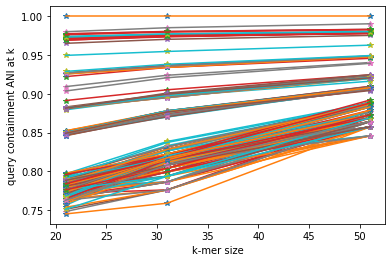

In [51]:
for n, row in k_sub.iterrows():
    #if n > 100: break
    qname, mname, k21_bp, k21_ani, k31_bp, k31_ani, k51_bp, k51_ani = row
    pylab.plot((21, 31, 51), (k21_ani, k31_ani, k51_ani), '*')
    pylab.plot((21, 31, 51), (k21_ani, k31_ani, k51_ani), '-')

pylab.ylabel('query containment ANI at k')
pylab.xlabel('k-mer size')